In [12]:
# Пример загрузки одного изображения
def preprocess_single_image(image_path, shape=256):
    img = plt.imread(image_path)
    img = cv2.resize(img, (shape, shape))
    img = img / 255.0  # нормализация, если нужно
    img = np.expand_dims(img, axis=0)  # добавляем batch dimension
    return img


In [14]:
from tensorflow.keras.models import load_model

model = load_model('./models/BreastCancerSegmentor.h5')


In [15]:
def predict_and_plot(image_path, model, shape=256):
    img = plt.imread(image_path)
    input_img = cv2.resize(img, (shape, shape))
    norm_img = input_img / 255.0
    prediction = model.predict(np.expand_dims(norm_img, axis=0))[0, :, :, 0]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_img)
    plt.title("Input Image")

    plt.subplot(1, 2, 2)
    plt.imshow(prediction, cmap='gray')
    plt.title("Predicted Mask")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


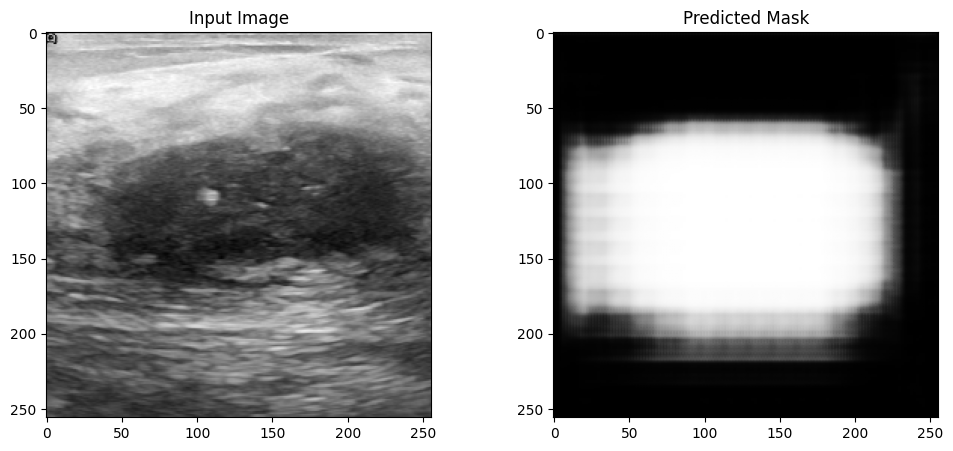

In [20]:
#Вывод одного изображения
predict_and_plot('malignant.png', model)
